<a href="https://colab.research.google.com/github/SALMA55ASHRAF/linkedinProject/blob/master/stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries iwill work with
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.describe(include='O') # catgorical variables only

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [9]:
df.columns # names of columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
df.isnull().sum() # to know sum of all missing values in all columns

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
df.bmi.isnull().sum() # 201 missing value

201

In [13]:
#perctange of missing value=no of missing / no of all samples *100
p=(201/5110)*100
p

3.9334637964774952

about 4 % of data is null(missing)



1.  we see data distrubtion first and see is it symmatric or not
2.  then we must know best fill to it is it median or mean(symmtric)or drop or mode






<Axes: xlabel='bmi', ylabel='Count'>

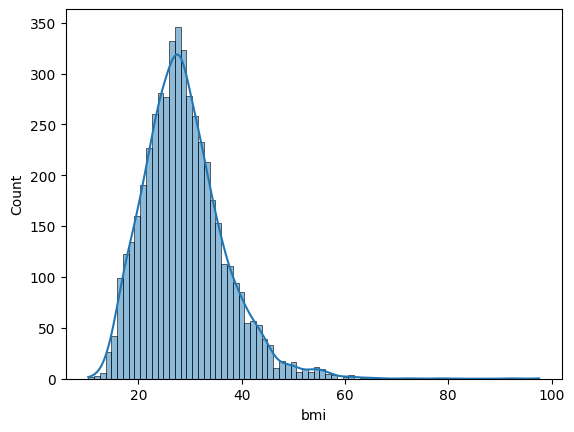

In [14]:
sns.histplot(data=df['bmi'],kde=True)

we see from graph its not mainly symmtric but we will fill it first with median and see the result

In [16]:
df['bmi'].median()

28.1

In [35]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [36]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status         0
stroke                 0
bmi_cat              201
age_cat                0
dtype: int64

<Axes: xlabel='stroke', ylabel='Count'>

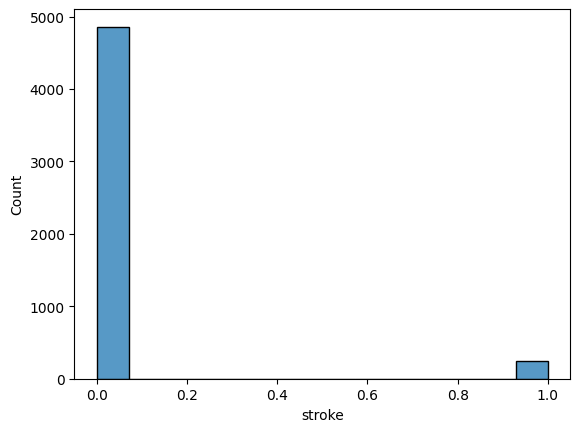

In [37]:
sns.histplot(df['stroke'])

we see here that the data is baised as the number of collected persons is more with no stroke than with stroke

In [38]:
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels =['Underweight', 'Ideal', 'Overweight', 'Obesity'])

<Axes: xlabel='age', ylabel='Count'>

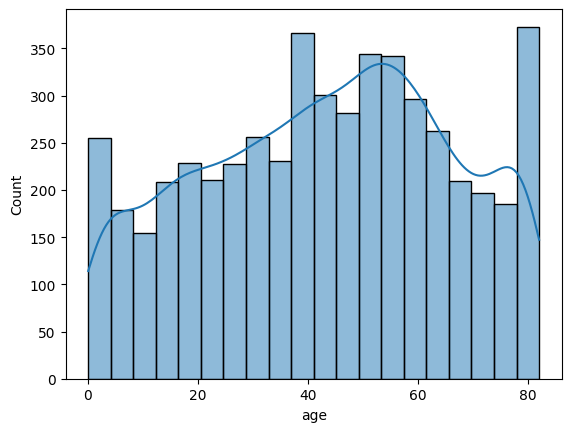

In [39]:
sns.histplot(df['age'],kde=True)

In [40]:
df['age_cat']=pd.cut(df['age'],bins=[0,12,25,50,60,100],labels=['Children', 'Teens', 'Adults','Mid Adults','Elderly'])

In [41]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obesity,Elderly
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Overweight,Elderly


In [44]:
df['glucose_cat']=pd.cut(df['avg_glucose_level'],bins=[0,72,99,180,1000],labels=['low','noraml','high','very_high'])

In [45]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obesity,Elderly,very_high
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Overweight,Elderly,very_high


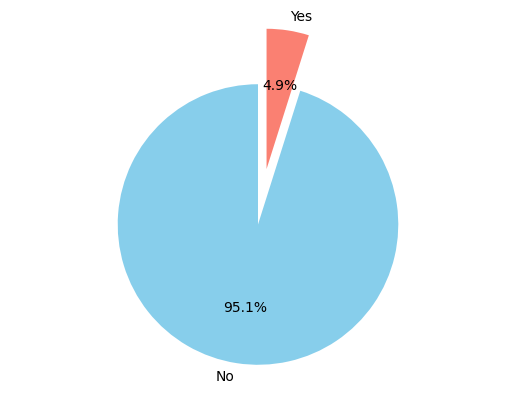

In [47]:
stroke_counts = df['stroke'].value_counts()
plt.pie(stroke_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], explode = (0.1, 0.3))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

here we see that our data is baised

<Axes: xlabel='age', ylabel='Count'>

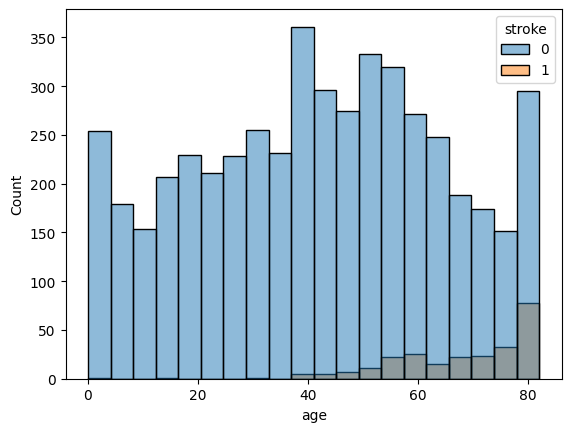

In [54]:
# TODO : visualise the age categories and the target
# Answering question related to what age categories is more likely to have a stroke?
sns.histplot(data=df,x='age',hue='stroke')

the elderly 🧓 catogrt tend to have more stroke (80 years and up)

<Axes: xlabel='gender', ylabel='stroke'>

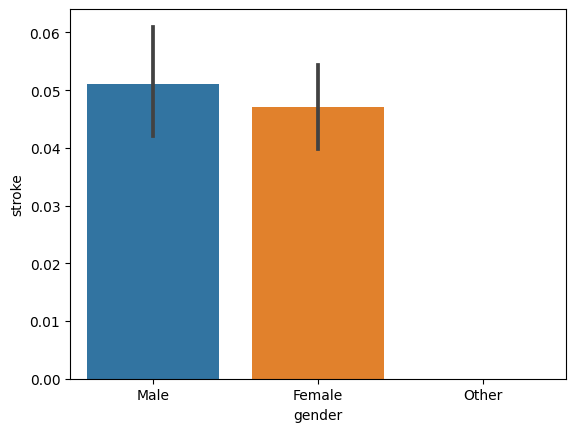

In [61]:
# TODO : visualise the gender and the target
import seaborn as sns
sns.barplot(x=df['gender'],y=df['stroke'])

<Axes: xlabel='gender', ylabel='Count'>

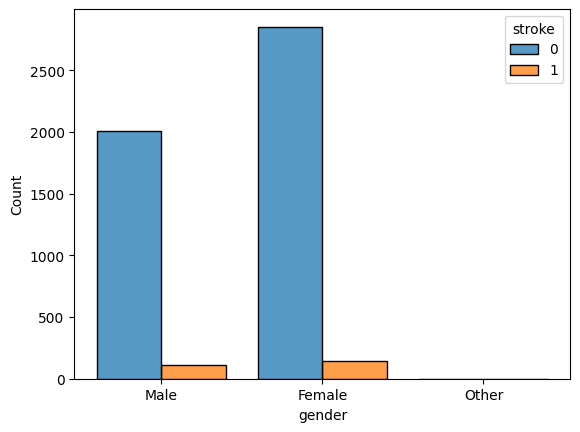

In [68]:
sns.histplot(data=df,x='gender',hue='stroke',shrink=.8,multiple="dodge")

female tend to have more stroke than men and tend to have no stroke than men

In [69]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

we have more female than male in our data which tend to alittle bias

<Axes: xlabel='hypertension', ylabel='Count'>

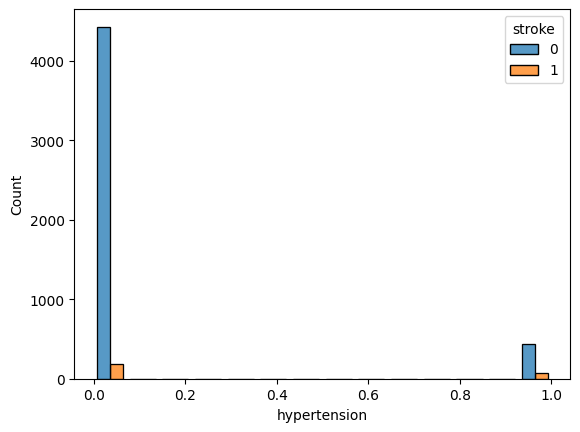

In [70]:
# TODO : visualise the hypertension and the target
sns.histplot(data=df,x='hypertension',hue='stroke',shrink=.8,multiple="dodge")

we see that people with hypertension have less stroke than people without

<Axes: xlabel='ever_married', ylabel='Count'>

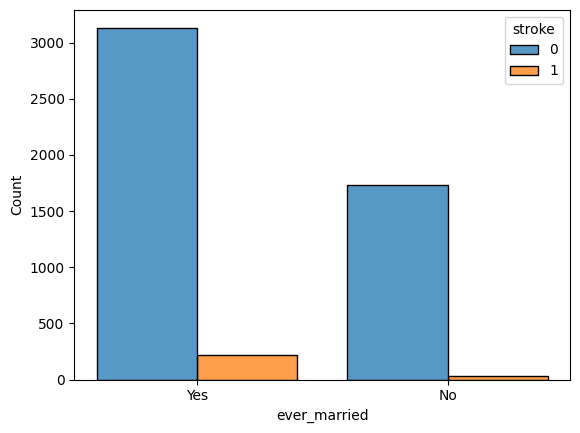

In [71]:
# TODO : visualise ever_married with the target
sns.histplot(data=df,x='ever_married',hue='stroke',shrink=.8,multiple="dodge")

In [72]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<Axes: xlabel='glucose_cat', ylabel='Count'>

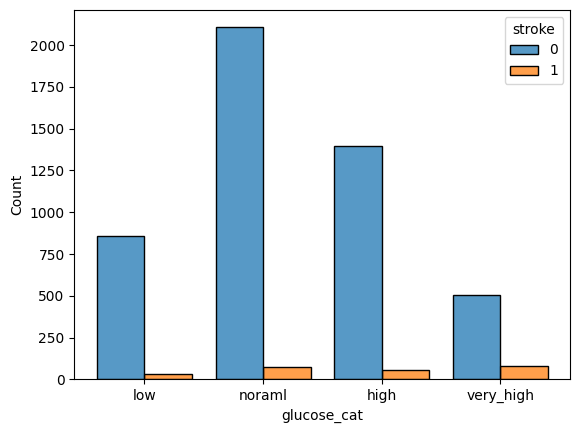

In [73]:
# TODO : visualise glucose_cat with the target
sns.histplot(data=df,x='glucose_cat',hue='stroke',shrink=.8,multiple="dodge")

in very high level of glucose the more person is going to have astroke

<Axes: xlabel='Residence_type', ylabel='Count'>

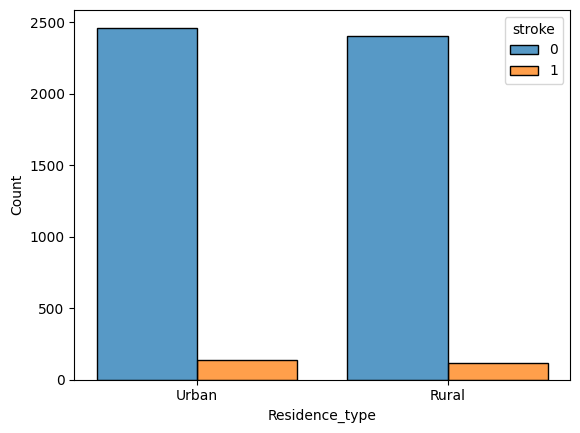

In [74]:
# TODO : Residence_type and the target
sns.histplot(data=df,x='Residence_type',hue='stroke',shrink=.8,multiple="dodge")

urban people tend to have more stroke than rural

In [75]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64